In [3]:
import pandas as pd

In [4]:
df1 = pd.read_excel('data/Aracaju.xlsx')
df2 = pd.read_excel('data/Fortaleza.xlsx')
df3 = pd.read_excel('data/Natal.xlsx')
df4 = pd.read_excel('data/Recife.xlsx')
df5 = pd.read_excel('data/Salvador.xlsx')

In [5]:
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
173,Natal,2019-01-02,31.77,1034,2
35,Salvador,2019-01-01,241.45,1037,1
72,Aracaju,2018-01-01,168.95,1523,7
185,Salvador,2019-01-02,6.67,1036,1
205,Salvador,2019-01-02,196.09,1037,1


In [10]:
#alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

### Tratando valores faltantes

In [12]:
#consultando linhas sem dados
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
#apagando linhas com valores nulos
df.dropna(inplace=True)

In [14]:
#apagando linhas com valores nulos com base em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [15]:
#criando coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [16]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [17]:
df['Receitas/Vendas'] = df['Receita']/ df['Vendas']

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [20]:
df['Receita'].max()

3544.0

In [21]:
df['Receita'].min()

3.34

In [22]:
#top 3 receitas
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [23]:
#top 3 piores receitas
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [24]:
#agrupando por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [25]:
#ordenando conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [28]:
#transformando a coluna de data em int
df['Data'] = df['Data'].astype('int64')

In [30]:
df.dtypes

Cidade              object
Data                 int64
Vendas             float64
LojaID              object
Qtde                 int64
Receita            float64
Receitas/Vendas    float64
dtype: object

In [33]:
#transformando em data novamente
df['Data']=pd.to_datetime(df['Data'])

In [34]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas           float64
dtype: object

In [35]:
#agrupando por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
#criando uma nova coluna com o ano
df['Ano_venda'] = df['Data'].dt.year

In [37]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018


In [38]:
#extraindo mês e dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda
59,Aracaju,2018-01-01,15.07,1523,7,105.49,7.0,2018,1,1
47,Natal,2018-03-13,521.00,854,3,1563.00,3.0,2018,3,13
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,2019,3,11
56,Fortaleza,2019-01-01,18.43,1002,1,18.43,1.0,2019,1,1
118,Natal,2019-01-02,92.21,1035,2,184.42,2.0,2019,1,2


In [40]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [41]:
#calculando diferença de dias
df['diferenca_dias'] = df['Data']-df['Data'].min()

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias
42,Aracaju,2018-01-01,40.00,1520,8,320.00,8.0,2018,1,1,0 days
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,1.0,2019,2,11,406 days
109,Aracaju,2018-01-01,51.64,1523,5,258.20,5.0,2018,1,1,0 days
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2.0,2019,2,11,406 days
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days


In [43]:
#coluna de trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
141,Recife,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,2,425 days,1
29,Aracaju,2018-01-01,44.04,1520,6,264.24,6.0,2018,1,1,0 days,1
154,Salvador,2019-01-02,9.58,1037,1,9.58,1.0,2019,1,2,366 days,1
36,Aracaju,2018-01-01,37.99,1523,8,303.92,8.0,2018,1,1,0 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1


In [45]:
#Vizualização de dados

In [46]:
df['LojaID'].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

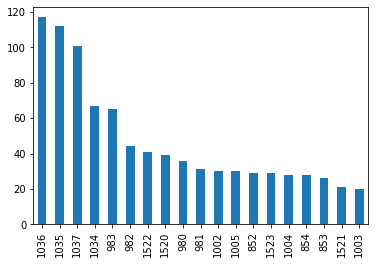

In [47]:
#grafico de barras
df['LojaID'].value_counts(ascending = False).plot.bar()

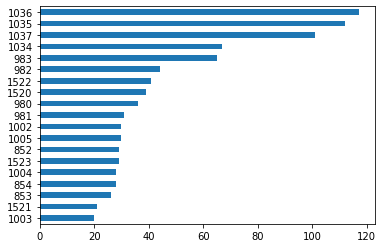

In [50]:
#grafico de barras na horizontal
df['LojaID'].value_counts(ascending = True).plot.barh();

<AxesSubplot:ylabel='Receita'>

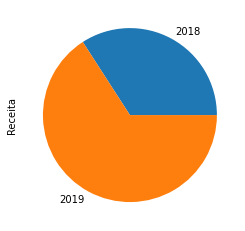

In [51]:
#grafico de pizza
df.groupby(df['Ano_venda'])['Receita'].sum().plot.pie()

In [52]:
#total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Vendas')

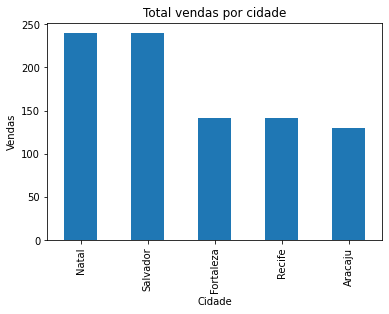

In [53]:
#adicionando titulo e alterando nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = 'Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Vendas')

Text(0, 0.5, 'Vendas')

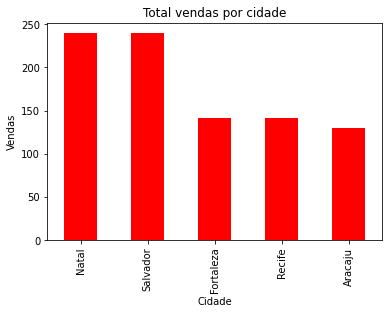

In [54]:
df['Cidade'].value_counts().plot.bar(title = 'Total vendas por cidade', color = 'red')
plt.xlabel('Cidade')
plt.ylabel('Vendas')

In [55]:
#alterando estilo
plt.style.use('ggplot')

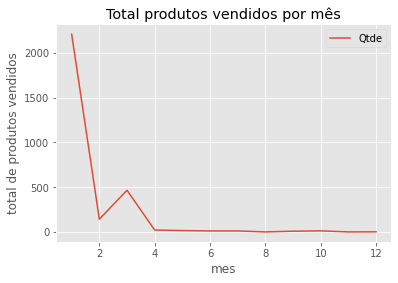

In [58]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total produtos vendidos por mês')
plt.xlabel('mes')
plt.ylabel('total de produtos vendidos');
plt.legend()

In [59]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [60]:
df_2019 = df[df['Ano_venda'] == 2019]

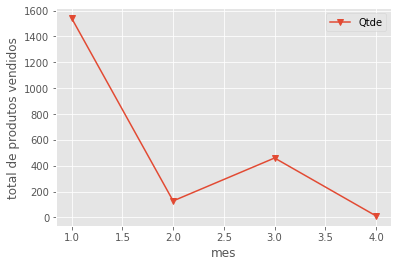

In [62]:
#total de produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('mes')
plt.ylabel('total de produtos vendidos');
plt.legend();

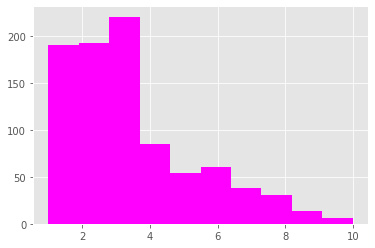

In [65]:
#histograma
plt.hist(df['Qtde'], color = 'magenta');

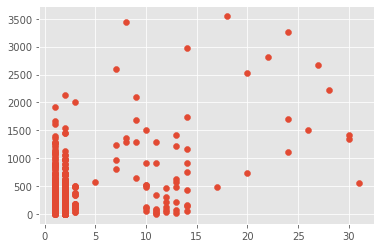

In [67]:
plt.scatter(x=df_2019['dia_venda'], y = df_2019['Receita']);

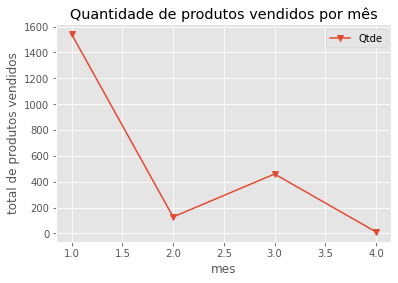

In [69]:
#salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de produtos vendidos por mês')
plt.xlabel('mes')
plt.ylabel('total de produtos vendidos');
plt.legend();
plt.savefig('grafico QTDE x Mes.pdf')